In [1]:
from lpa_pipeline import validator, vcf_translate, statistical, data_management, settings

# Data Management

In [2]:
DM = data_management.DataManager_LPA()

In [3]:
DM.paths

{'snps': 'snps',
 'genotypes': 'genotypes',
 'vcfs': 'vcfs',
 'analysis_results': 'data_analysis_result'}

In [4]:
DM.versions

{'snps': ['simple', '20miss', 'pheno_snps_ethnicity'],
 'genotypes': ['simple', '20miss'],
 'vcfs': ['20miss'],
 'analysis_results': ['Logistic',
  'OLS',
  'pysm_Lasso',
  'python_sm_Nov26',
  'python_sm_Nov23']}

In [5]:
vcf_paths = DM.path_tool_vcf(version_name = "20miss", ethnicity = "eu")

In [6]:
DM.path_tool_csv(version_name = "simple")

{'pheno': {'eu': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/pheno_snps_ethnicity_1.csv',
  'af': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/pheno_snps_ethnicity_2.csv',
  'hisp': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/pheno_snps_ethnicity_3.csv',
  'others': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/pheno_snps_ethnicity_4.csv',
  'complete': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/pheno_snps_ethnicity_complete.csv'},
 'geno': {'eu': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/geno_ethnicity_1.csv',
  'af': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/geno_ethnicity_2.csv',
  'hisp': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/geno_ethnicity_3.csv',
  'others': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/geno_ethnicity_4.csv',
  'complete': '/mnt/mfs/hgrcgrid/shared/LPA_analysis/snps/simple/geno_ethnicity_complete.csv'}}

# Data Completeness testing

In [7]:
# Create a validator
EV = validator.EnsembleValidator(data_manager = DM)
source_fail_list, pipeline_fail_list = EV.validate(version_name = "20miss", ethnicity = "complete")

Pass: All the related files to pheno_snps_ethnicity_complete.csv is validated


# Data Loading

In [8]:
DL = data_management.DataLoader_LPA(data_manager = DM)

In [9]:
DL.load_dataset(version_name = "simple")

In [10]:
genotype, snp_x, snp_y = DL.get_dataset(ethnicity = "af", n_table = 3)

In [11]:
df, snp_y = DL.get_dataset(ethnicity = "complete", n_table = 2)

In [12]:
statistical.edav(DL.get_snp_ys(), label = "DEMENTIA")

----------------Summary for label DEMENTIA----------------
NA exist:False
1.0    477
2.0    236
3.0      8
Name: DEMENTIA, dtype: int64
NA exist:False
1.0    493
2.0    434
3.0     13
Name: DEMENTIA, dtype: int64
NA exist:False
2.0    1024
1.0     647
3.0      28
Name: DEMENTIA, dtype: int64
NA exist:False
2.0    1694
1.0    1617
3.0      49
Name: DEMENTIA, dtype: int64


----------------Summary for label LIP03_B----------------
NA exist:True
NA exist:True
NA exist:True
NA exist:True


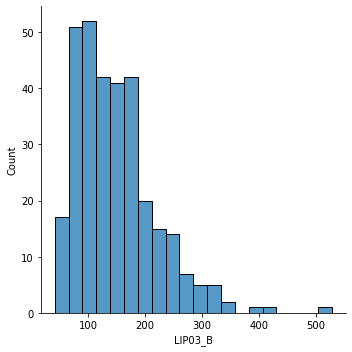

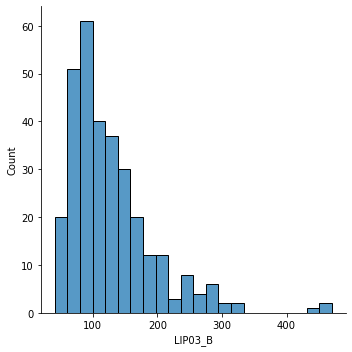

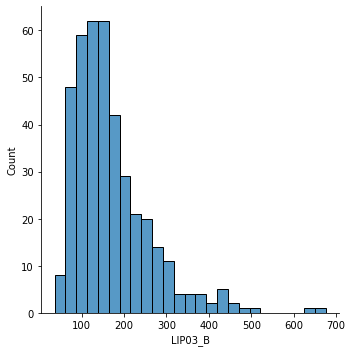

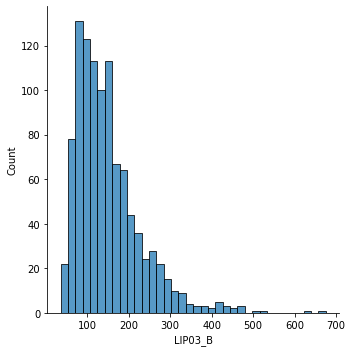

In [13]:
statistical.edav(DL.get_snp_ys(), label = "LIP03_B")

In [14]:
DL.load_vcf(version_name = "20miss")

In [15]:
DL.get_vcf(ethnicity = "complete")

pos-ref/alt,11-G/A,16-T/C,17-G/A,21-G/A,31-T/C,33-T/C,34-C/T,35-C/G,"35-C/G,A","35-C/G,-",...,5089-G/A,5090-G/T,5092-G/T,5093-T/G,5094-G/T,5096-T/C,5098-T/G,5099-C/T,5099-C/G,5099-C/A
washei25748,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei25756,0/0,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei25759,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei25762,0/0,0/0,0/0,0/1,0/1,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei25772,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
washei71450,0/0,0/0,0/0,0/1,0/1,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei71451,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei71452,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
washei71453,0/0,0/0,0/0,0/1,0/1,0/0,0/0,1/0,0/0,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
